In [52]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
  

In [2]:
#Loading the data
data0 = pd.read_csv('PhishingDataset.csv')
data0.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## 3. Familiarizing with Data
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Checking the shape of the dataset
data0.shape

(11055, 31)

In [4]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

# 4. Visualizing the data
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

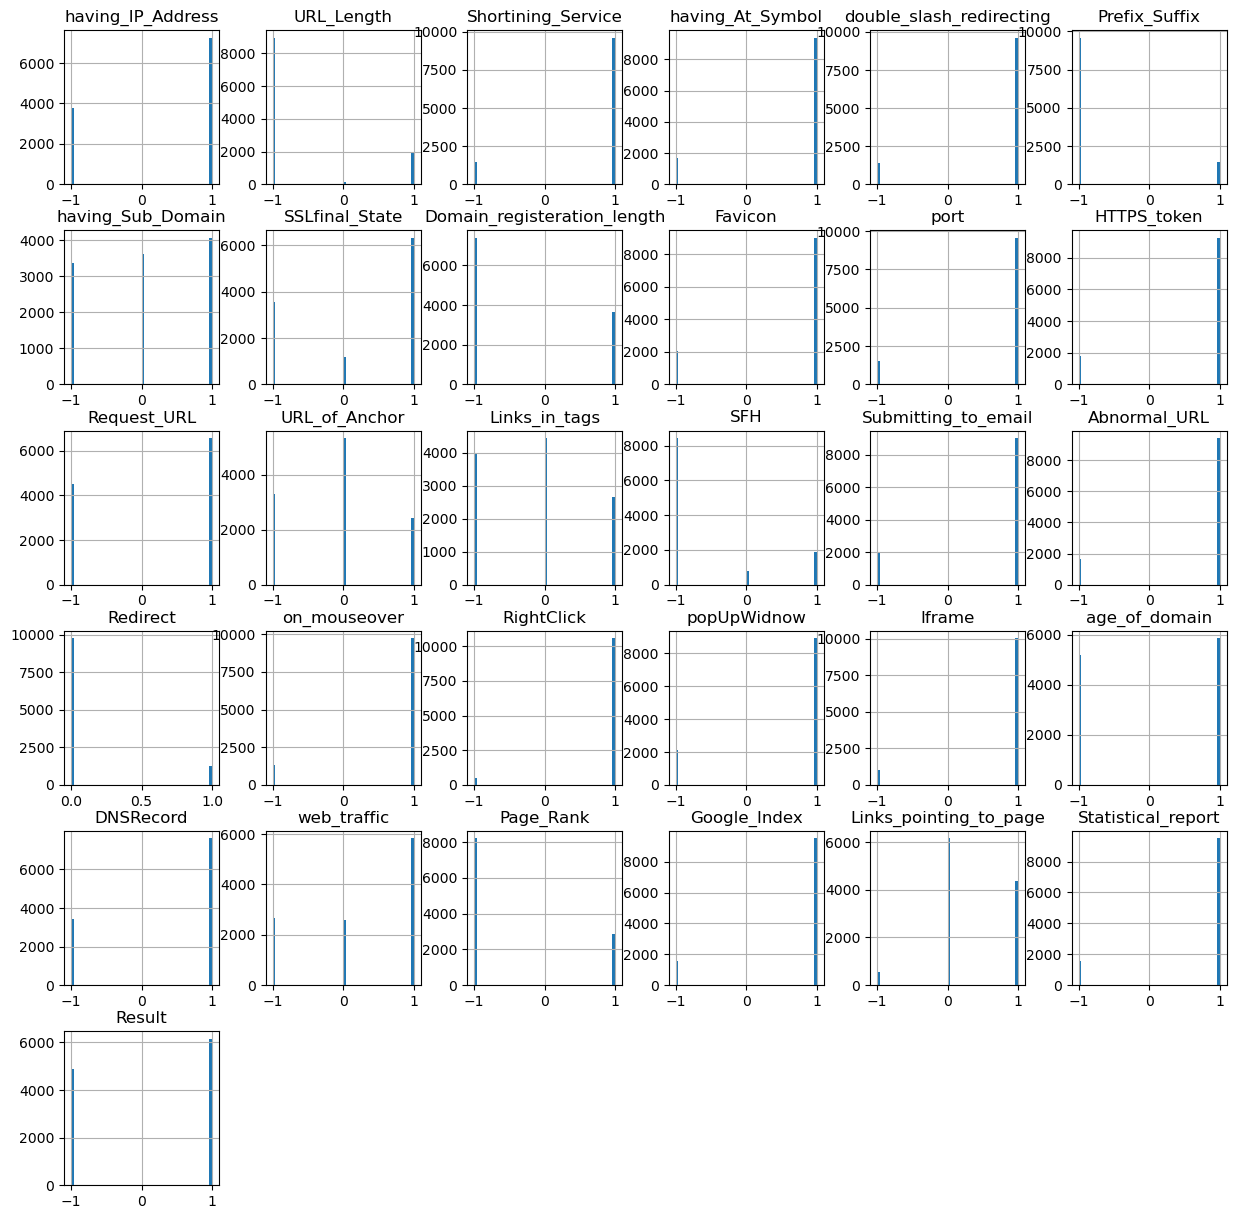

In [5]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

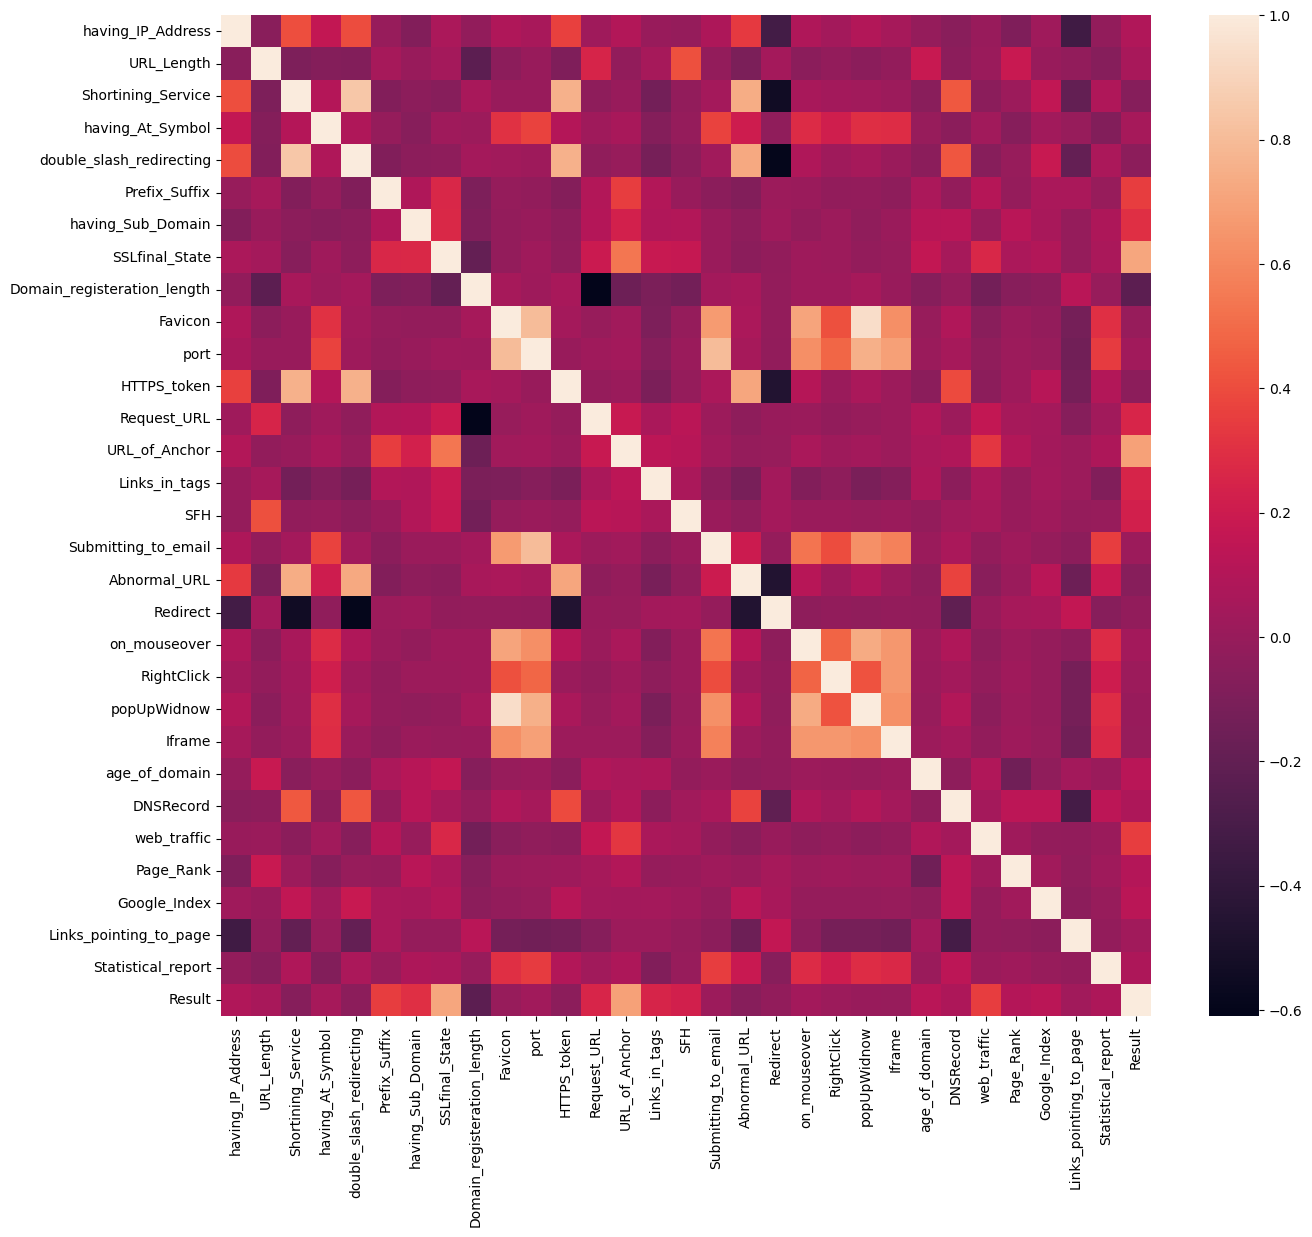

In [6]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

#5. Data Preprocessing & EDA
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [7]:
data0.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#checking the data for null or missing values
data0.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## 6. Splitting the Data

In [9]:
# Sepratating & assigning features and target columns to X & y
y = data0['Result']
X = data0.drop('Result',axis=1)
X.shape, y.shape

((11055, 30), (11055,))

In [10]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 30), (2211, 30))

## **7. Machine Learning Models & Training**


In [11]:
#importing packages
from sklearn.metrics import accuracy_score , f1_score , recall_score, roc_auc_score , precision_score, roc_curve, auc

In [12]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
acc_precision = []
acc_recall = []
acc_f1 = []
acc_roc = []
 
#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
  ML_Model.append(model)
  acc_train.append(round(a, 4))
  acc_test.append(round(b, 4))
  acc_precision.append(round(c, 4))
  acc_recall.append(round(d, 4))
  acc_f1.append(round(e, 4))
  acc_roc.append(round(f, 4))

  
   

## Decision Tree Classifier

In [13]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [15]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
acc_precision_tree = precision_score(y_test,y_test_tree)
acc_recall_tree = recall_score(y_test,y_test_tree)
acc_f1_tree = f1_score(y_test,y_test_tree)
acc_roc_tree = roc_auc_score(y_test,y_test_tree)
 
 
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: precision on test Data: {:.3f}".format(acc_precision_tree))
print("Decision Tree: recall on test Data: {:.3f}".format(acc_recall_tree))
print("Decision Tree: f1 on test Data: {:.3f}".format(acc_f1_tree))
print("Decision Tree: roc on test Data: {:.3f}".format(acc_roc_tree))
 

Decision Tree: Accuracy on training Data: 0.927
Decision Tree: Accuracy on test Data: 0.927
Decision Tree: precision on test Data: 0.910
Decision Tree: recall on test Data: 0.962
Decision Tree: f1 on test Data: 0.935
Decision Tree: roc on test Data: 0.924


In [16]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_tree))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_tree))

Accucary: 0.9271822704658526
Confusion Matrix
 [[ 886  115]
 [  46 1164]]


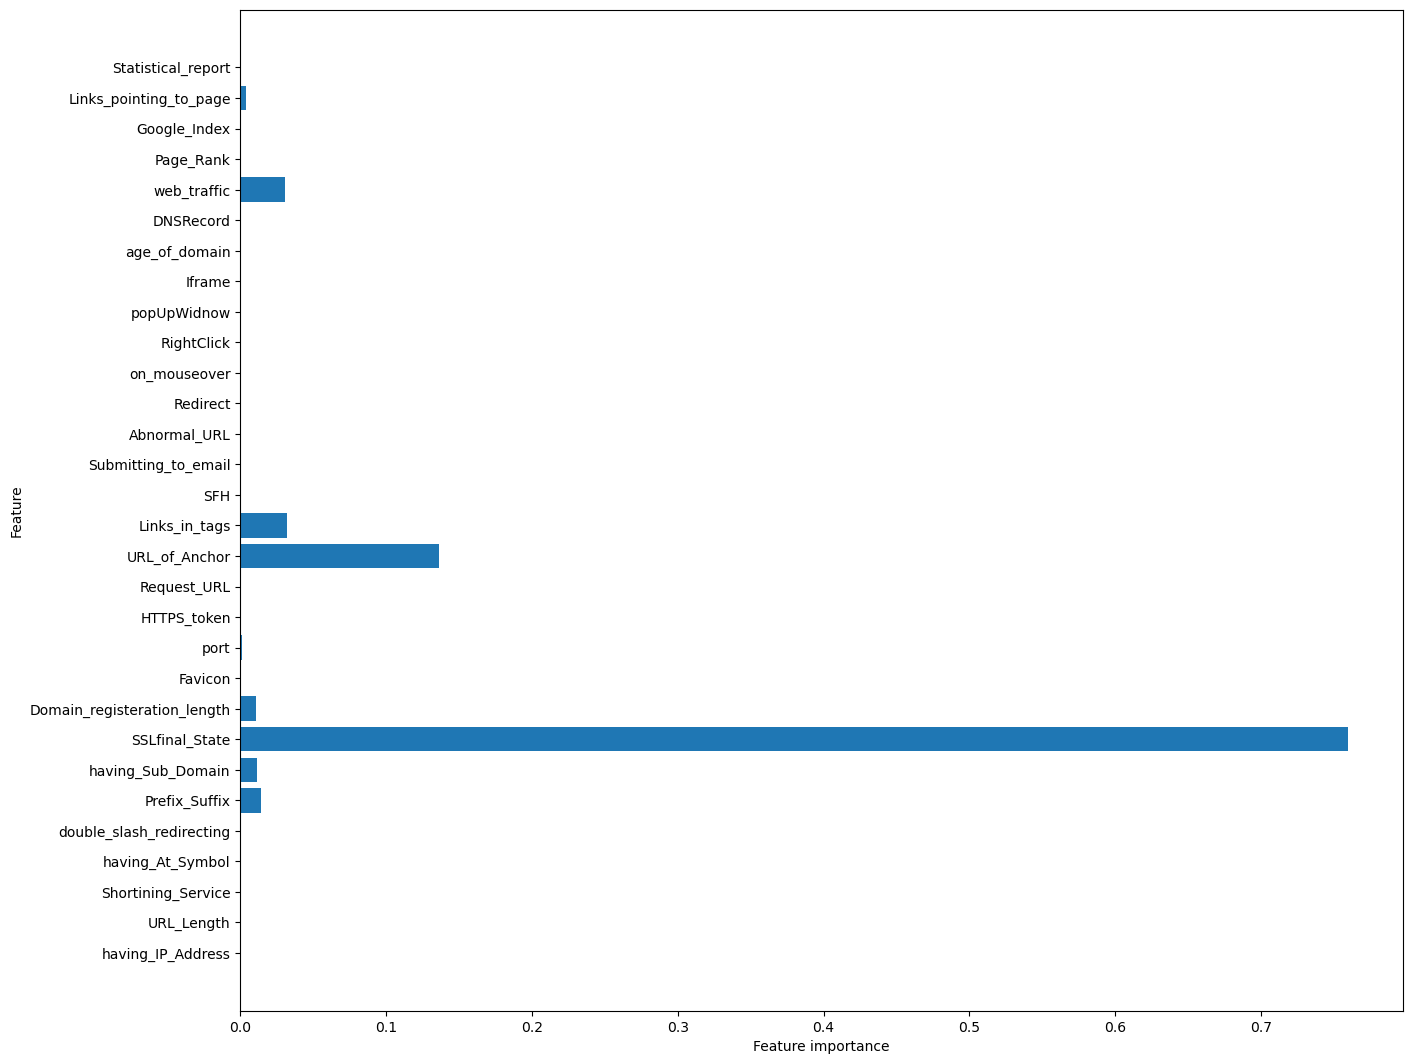

In [17]:
#checking the feature improtance in the model
plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing results**

In [18]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree,acc_precision_tree,acc_recall_tree,acc_f1_tree,acc_roc_tree)
 

##7.2. Random Forest Classifier

In [19]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [20]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [21]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
acc_precision_forest = precision_score(y_test,y_test_forest)
acc_recall_forest = recall_score(y_test,y_test_forest)
acc_f1_forest = f1_score(y_test,y_test_forest)
acc_roc_forest = roc_auc_score(y_test,y_test_forest)
 
 
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Random forest: precision on test Data: {:.3f}".format(acc_precision_forest))
print("Random forest: recall on test Data: {:.3f}".format(acc_recall_forest))
print("Random forest: f1 on test Data: {:.3f}".format(acc_f1_forest))
print("Random forest: roc on test Data: {:.3f}".format(acc_roc_forest))
 

Random forest: Accuracy on training Data: 0.934
Random forest: Accuracy on test Data: 0.936
Random forest: precision on test Data: 0.923
Random forest: recall on test Data: 0.964
Random forest: f1 on test Data: 0.943
Random forest: roc on test Data: 0.933


In [22]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_forest))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_forest))

Accucary: 0.9362279511533242
Confusion Matrix
 [[ 904   97]
 [  44 1166]]


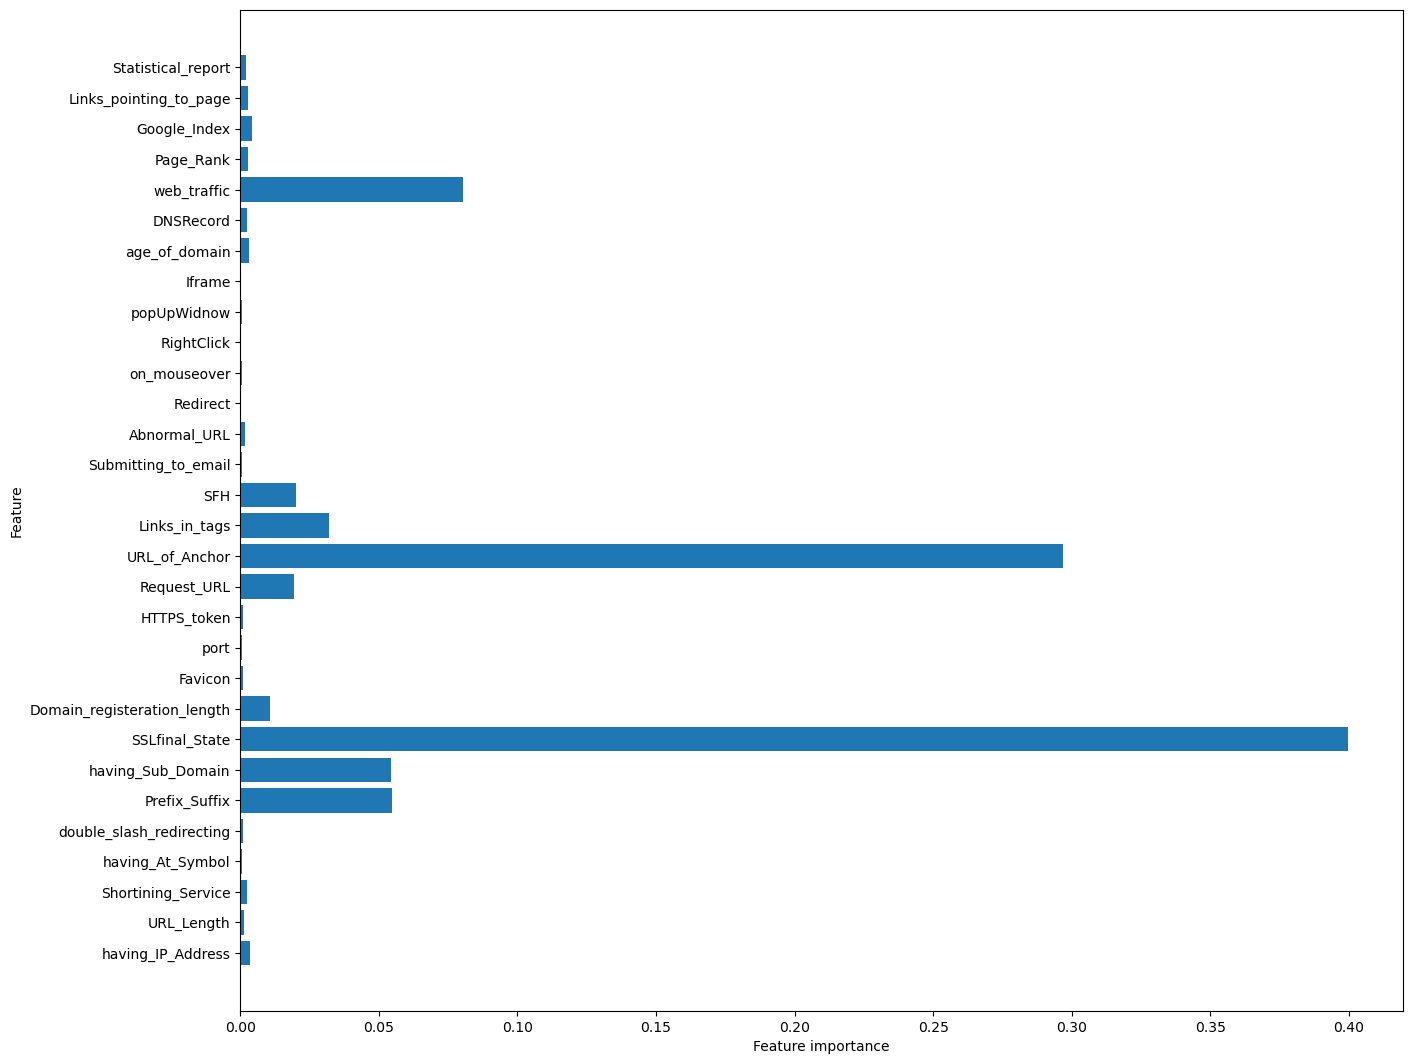

In [23]:
#checking the feature improtance in the model
plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [24]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest,acc_precision_forest,acc_recall_forest,acc_f1_forest,acc_roc_forest)
 

## 7.3. Support Vector Machines

In [25]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='poly', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=12)

In [26]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [27]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
acc_precision_svm = precision_score(y_test,y_test_svm)
acc_recall_svm = recall_score(y_test,y_test_svm)
acc_f1_svm = f1_score(y_test,y_test_svm)
acc_roc_svm = roc_auc_score(y_test,y_test_svm)
 
 
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("SVM: precision on test Data: {:.3f}".format(acc_precision_svm))
print("SVM: recall on test Data: {:.3f}".format(acc_recall_svm))
print("SVM: f1 on test Data: {:.3f}".format(acc_f1_svm))
print("SVM: roc on test Data: {:.3f}".format(acc_roc_svm))
 

SVM: Accuracy on training Data: 0.958
SVM: Accuracy on test Data: 0.960
SVM: precision on test Data: 0.956
SVM: recall on test Data: 0.971
SVM: f1 on test Data: 0.964
SVM: roc on test Data: 0.959


In [28]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_svm))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_svm))

Accucary: 0.9597467209407508
Confusion Matrix
 [[ 947   54]
 [  35 1175]]


**Storing the results:**

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm,acc_precision_svm,acc_recall_svm,acc_f1_svm,acc_roc_svm)
 

##7.4. XGBoost Classifier

In [30]:
#XGBoost Classification model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [32]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
acc_precision_xgb = precision_score(y_test,y_test_xgb,average='micro')
acc_recall_xgb = recall_score(y_test,y_test_xgb,average='micro')
acc_f1_xgb = f1_score(y_test,y_test_xgb,average='micro')
acc_roc_xgb = roc_auc_score(y_test,y_test_xgb,average='micro')
 
 
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: precision on test Data: {:.3f}".format(acc_precision_xgb))
print("XGBoost: recall on test Data: {:.3f}".format(acc_recall_xgb))
print("XGBoost: f1 on test Data: {:.3f}".format(acc_f1_xgb))
print("XGBoost: roc on test Data: {:.3f}".format(acc_roc_xgb))
 

XGBoost: Accuracy on training Data: 0.989
XGBoost: Accuracy on test Data: 0.536
XGBoost: precision on test Data: 0.536
XGBoost: recall on test Data: 0.536
XGBoost: f1 on test Data: 0.536
XGBoost: roc on test Data: 0.974


In [33]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_xgb))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_xgb))

Accucary: 0.5359565807327001
Confusion Matrix
 [[   0  969   32]
 [   0    0    0]
 [   0   25 1185]]


**Storing the results:**

In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb,acc_precision_xgb,acc_recall_xgb,acc_f1_xgb,acc_roc_xgb)
 

## 7.3. Stacked Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:

# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5)),
                        #('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42))) 
                        ('dt_1', DecisionTreeClassifier())        
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())


In [37]:
# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.5345997286295794

In [38]:
#predicting the target value from the model for the samples
y_test_stack = clf.predict(X_test)
y_train_stack = clf.predict(X_train)

In [39]:
#computing the accuracy of the model performance
acc_train_stack = accuracy_score(y_train,y_train_stack)
acc_test_stack = accuracy_score(y_test,y_test_stack)
acc_precision_stack = precision_score(y_test,y_test_stack,average='micro')
acc_recall_stack = recall_score(y_test,y_test_stack,average='micro')
acc_f1_stack = f1_score(y_test,y_test_stack,average='micro')
acc_roc_stack = roc_auc_score(y_test,y_test_stack,average='micro')
  
print("Stacking Classifier: Accuracy on training Data: {:.3f}".format(acc_train_stack))
print("Stacking Classifier: Accuracy on test Data: {:.3f}".format(acc_test_stack))
print("Stacking Classifier: precision on test Data: {:.3f}".format(acc_precision_stack))
print("Stacking Classifier: recall on test Data: {:.3f}".format(acc_recall_stack))
print("Stacking Classifier: f1 on test Data: {:.3f}".format(acc_f1_stack))
print("Stacking Classifier: roc on test Data: {:.3f}".format(acc_roc_stack))
 

Stacking Classifier: Accuracy on training Data: 0.984
Stacking Classifier: Accuracy on test Data: 0.535
Stacking Classifier: precision on test Data: 0.535
Stacking Classifier: recall on test Data: 0.535
Stacking Classifier: f1 on test Data: 0.535
Stacking Classifier: roc on test Data: 0.962


In [40]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Stacking Classifier', acc_train_stack, acc_test_stack,acc_precision_stack,acc_recall_stack,acc_f1_stack,acc_roc_stack)
 

## 8. Comparision of Models

In [41]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Precision': acc_precision,
    'Recall' : acc_recall,
    'f1 score': acc_f1,
    'ROC_AUC': acc_roc})

In [42]:
results

,ML Model,Train Accuracy,Test Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Decision Tree,0.9268,0.9272,0.9101,0.9620,0.9353,0.9235
1,Random Forest,0.9337,0.9362,0.9232,0.9636,0.9430,0.9334
2,SVM,0.9576,0.9597,0.9561,0.9711,0.9635,0.9586
3,XGBoost,0.9888,0.5360,0.5360,0.5360,0.5360,0.9737
4,Stacking Classifier,0.9837,0.5346,0.5346,0.5346,0.5346,0.9620


In [43]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)


,ML Model,Train Accuracy,Test Accuracy,Precision,Recall,f1 score,ROC_AUC
2,SVM,0.9576,0.9597,0.9561,0.9711,0.9635,0.9586
1,Random Forest,0.9337,0.9362,0.9232,0.9636,0.9430,0.9334
0,Decision Tree,0.9268,0.9272,0.9101,0.9620,0.9353,0.9235
3,XGBoost,0.9888,0.5360,0.5360,0.5360,0.5360,0.9737
4,Stacking Classifier,0.9837,0.5346,0.5346,0.5346,0.5346,0.9620


In [44]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_test_tree, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_test_forest, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_test_svm, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_test_stack, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_test_xgb, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


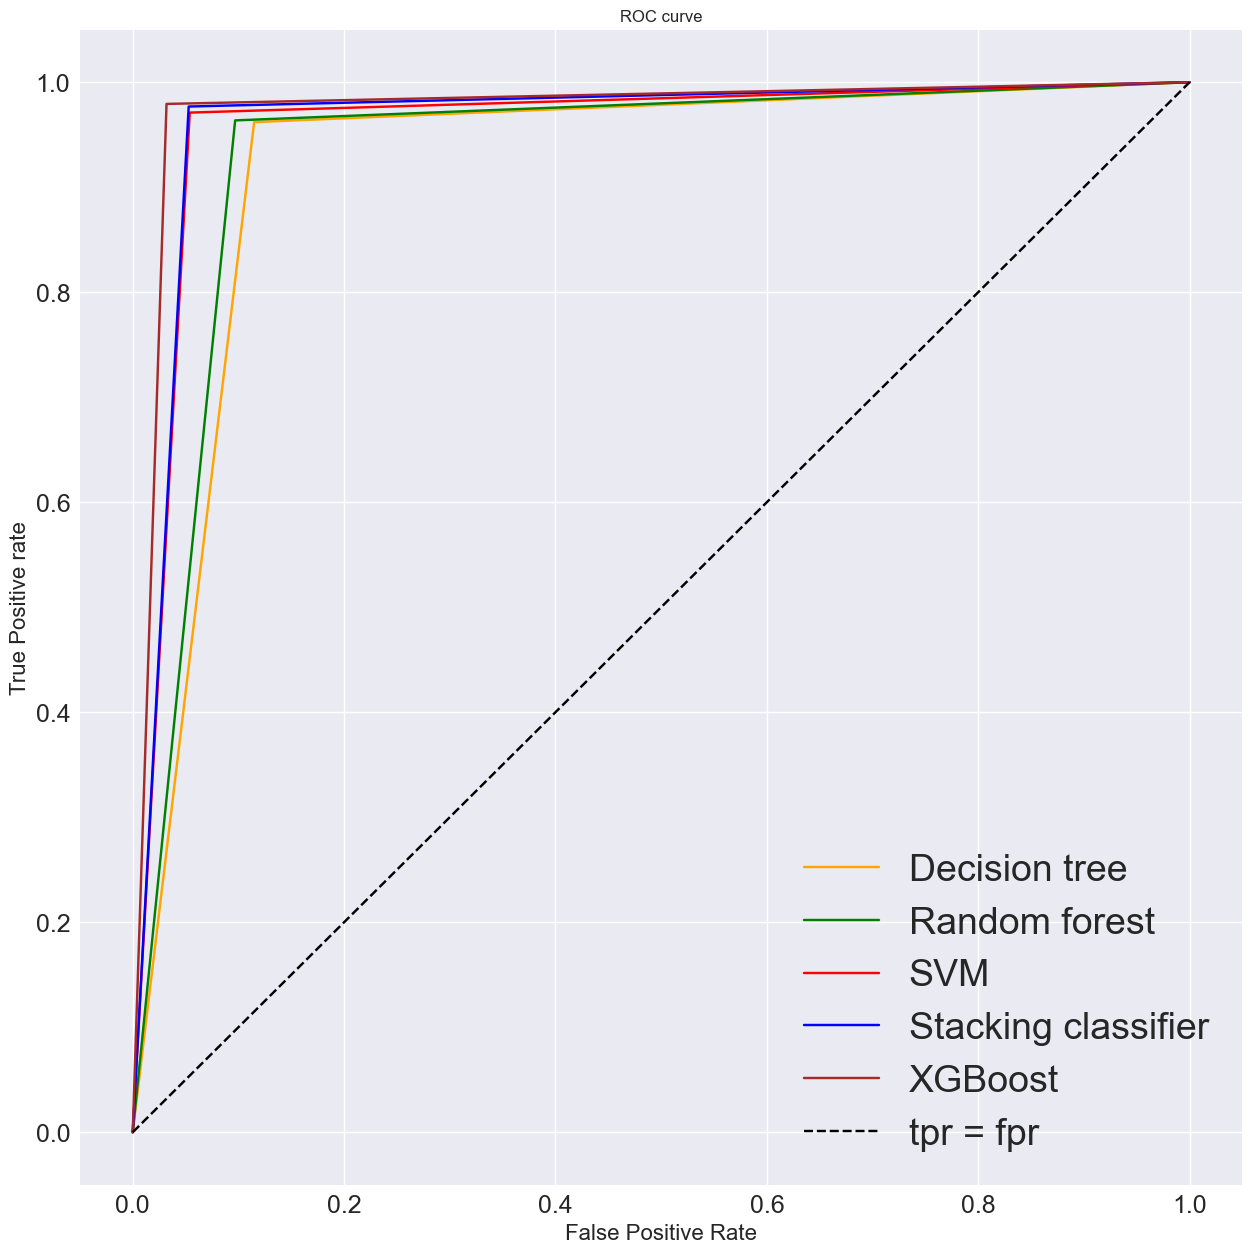

In [45]:
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.rc('axes', labelsize=17)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={"size":18})
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Decision tree')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='-',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='-',color='blue', label='Stacking classifier')
plt.plot(fpr5, tpr5, linestyle='-',color='brown', label='XGBoost')


plt.plot(p_fpr, p_tpr, linestyle='--', color='black',label='tpr = fpr')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate',fontsize=16)
# y label
plt.ylabel('True Positive rate',fontsize=16)
 
plt.legend(loc='best',fontsize=27)
plt.savefig('ROC')
plt.show();

In [46]:
import pickle
 

In [47]:
pickle.dump(clf, open("stack_fish1.pkl", 'wb'))

In [48]:
# load model from file
loaded_model = pickle.load(open("dt_fish1.sav", 'rb'))
print(loaded_model)
data = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
data = np.array(data).reshape(1, -1)
print(data)
predicted_value = loaded_model.predict(data)
print(predicted_value)

DecisionTreeClassifier(max_depth=5)
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]]
[-1]


c:\Users\padal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
url ='http://1079582b-459b-41f0-9e68-c2d6b3f2cf55.eastus2.azurecontainer.io/score'

import requests
import json
URLfeatures = [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 0, 0, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1]
URLfeatures = URLfeatures[0]

data = {
"data": URLfeatures,
"method": "predict" 
}

headers = {'Content-Type': 'application/json'}

r = requests.get(url, str.encode(json. dumps (data)), headers = headers) 
s = r.json()
predicted_value = s['predict']

print(predicted_value)
if predicted_value == 1:
  print("Legitimate")
if predicted_value == -1:
  print("Phishing")
 
 

ConnectionError: HTTPConnectionPool(host='1079582b-459b-41f0-9e68-c2d6b3f2cf55.eastus2.azurecontainer.io', port=80): Max retries exceeded with url: /score?%7B%22data%22:%201,%20%22method%22:%20%22predict%22%7D (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000204809C4100>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))